# 패키지

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 데이터

In [6]:
df_raw = pd.read_csv('./titanic.csv')
df_raw.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [7]:
# copy
import copy
df = copy.deepcopy(df_raw)
df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


# 데이터 전처리

### 결측치 처리

In [8]:
# Age 평균 대체
df['Age'].fillna(df['Age'].mean(), inplace = True)
# Cabin 값 'N' 대체
df['Cabin'].fillna('N', inplace = True)
# Cabin 값 첫 글자 대체
df['Cabin'] = df['Cabin'].str[:1]
# Embarked 'N' 값 대체
df['Embarked'].fillna('N', inplace = True)
# 결과 확인
df.isna().sum().sum()

0

### Encoding

In [9]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder
# Encoding
def encode(data) :
    features = data.select_dtypes(include = 'object')
    encoder = LabelEncoder()
    for feature in features :
        data[feature] = encoder.fit_transform(data[feature])
    
    return data

df = encode(df)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,108,1,22.0,1,0,523,7.2500,7,3
1,2,1,1,190,0,38.0,1,0,596,71.2833,2,0
2,3,1,3,353,0,26.0,0,0,669,7.9250,7,3
3,4,1,1,272,0,35.0,1,0,49,53.1000,2,3
4,5,0,3,15,1,35.0,0,0,472,8.0500,7,3


### 불필요한 변수 제거

In [10]:
df.drop(['PassengerId','Name','Ticket'], axis = 1, inplace = True)
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin',
       'Embarked'],
      dtype='object')

# 데이터 분할

In [11]:
# train_test_split
from sklearn.model_selection import train_test_split
# 설명변수, 목표변수 데이터 구분
df_x = df.drop('Survived', axis = 1, inplace = False)
df_y = df['Survived']
# 데이터 분할
X_train, X_test, Y_train, Y_test = train_test_split(df_x, df_y, test_size = 0.2, random_state = 11)
print('train data X size :', X_train.shape)
print('train data Y size :', Y_train.shape)
print('test data X size :', X_test.shape)
print('test data Y size :', Y_test.shape)

train data X size : (712, 8)
train data Y size : (712,)
test data X size : (179, 8)
test data Y size : (179,)


# Modeling

In [12]:
# 성능 평가
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve

# Logistic Regression
from sklearn.linear_model import LogisticRegression as LR
lr = LR(solver = 'liblinear')
lr.fit(X_train, Y_train)
y_pred = lr.predict(X_test)

### ROC curve

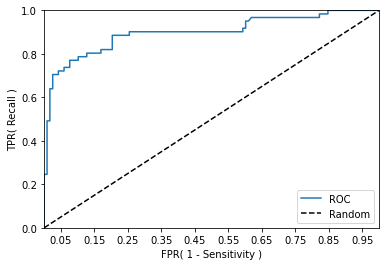

In [23]:
# Target이 1일 때의 예측 확률 추출
pred_proba_1 = lr.predict_proba(X_test)[:,1]
# roc_curve
def roc_curve_plot(Y_test, pred_proba_class1) :
    # TPR, FPR 값 반환
    fprs, tprs, thresholds = roc_curve(Y_test, pred_proba_class1)
    # ROC curve
    plt.plot(fprs, tprs, label = 'ROC')
    # 가운데 점선
    plt.plot([0,1],[0,1], 'k--', label = 'Random')
    # X 축 Scale 0.1 단위로 조정
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1);plt.ylim(0,1)
    # X,Y 축 이름
    plt.xlabel('FPR( 1 - Sensitivity )');plt.ylabel('TPR( Recall )')
    # 그래프 출력
    plt.legend();plt.show()
# 결과 확인
roc_curve_plot(Y_test, lr.predict_proba(X_test)[:,1])

### ROC AUC

In [24]:
# roc_auc_score
from sklearn.metrics import roc_auc_score
pred_proba = lr.predict_proba(X_test)[:,1]
roc_score = roc_auc_score(Y_test, pred_proba)
print("ROC_AUC 값 : {:.4f}".format(roc_score))

ROC_AUC 값 : 0.8987
